In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

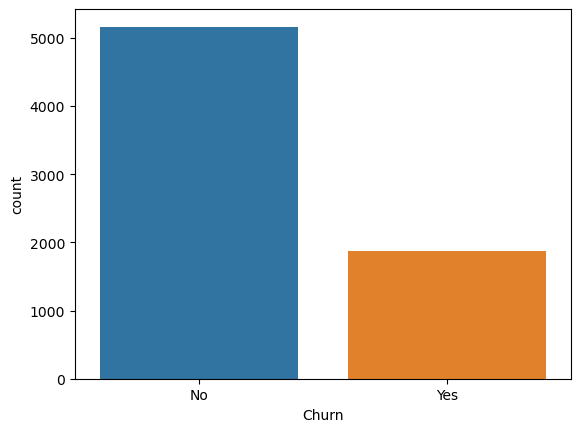

In [7]:
sns.countplot(x = df["Churn"])

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

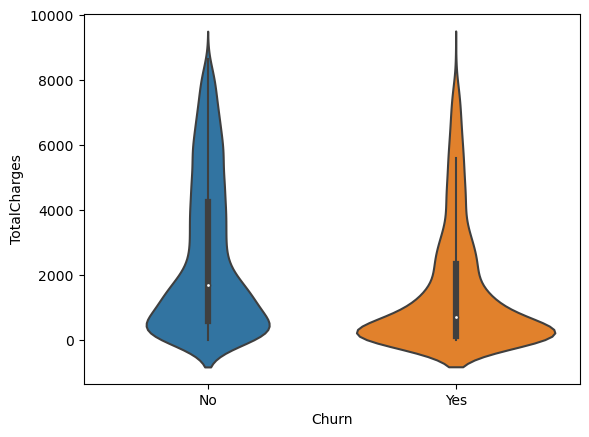

In [8]:
sns.violinplot(data = df, x = "Churn", y = "TotalCharges")

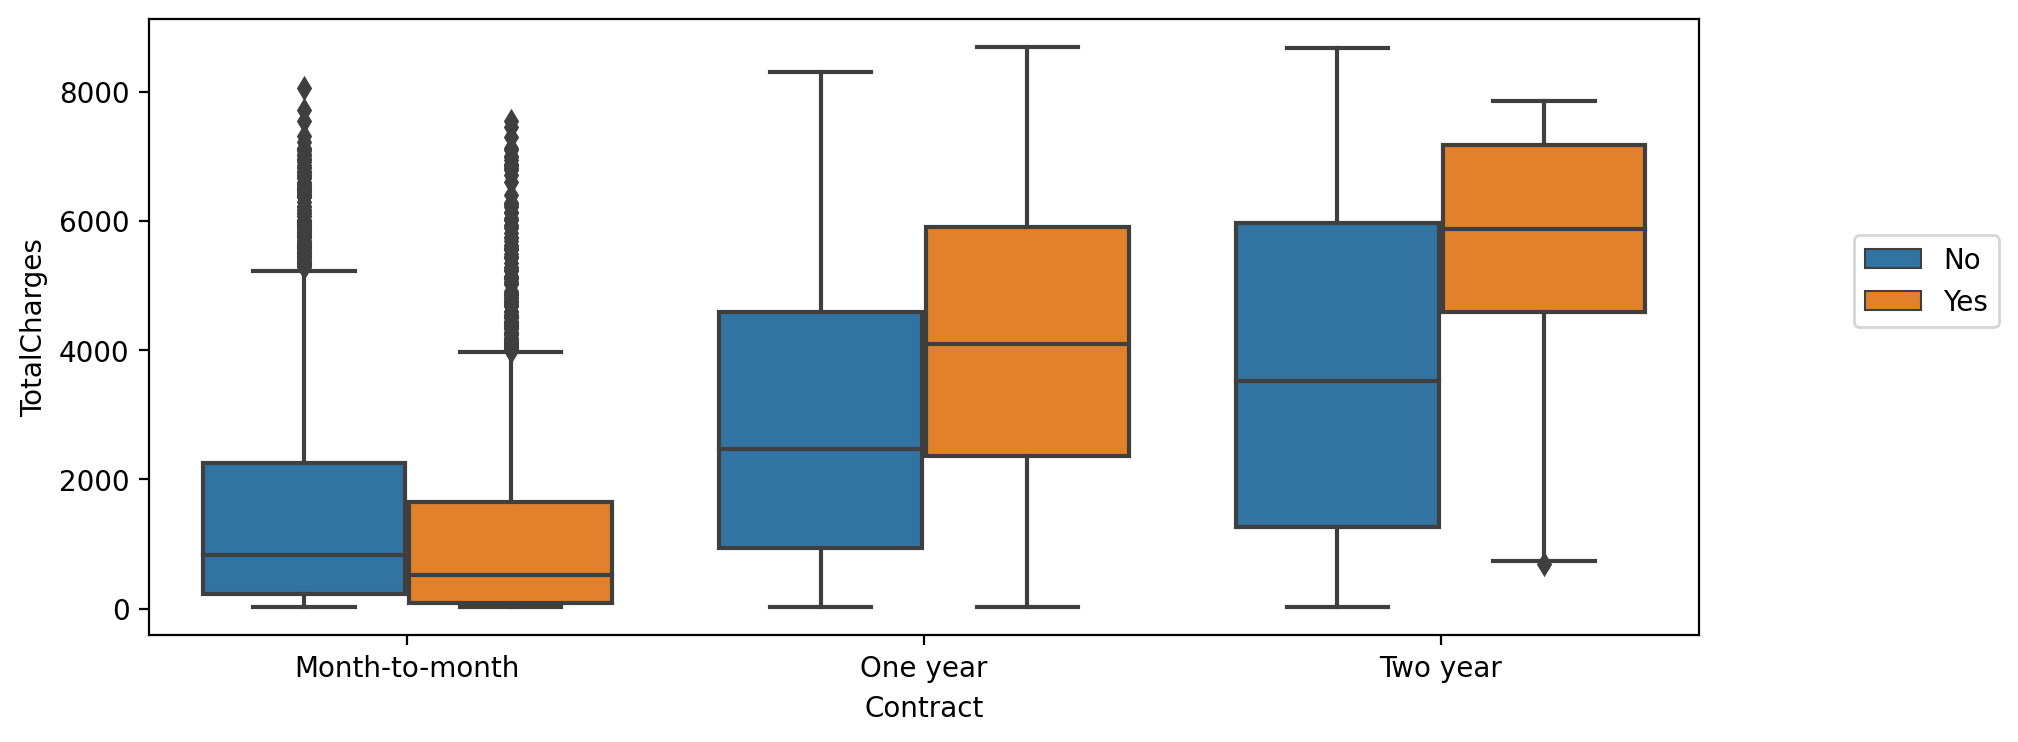

In [9]:
plt.figure(figsize = (10,4), dpi = 200)
sns.boxplot(data = df, x = "Contract", y = "TotalCharges", hue = "Churn")
plt.legend(loc = (1.1, 0.5))

In [10]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', "Churn"]]).corr()

In [11]:
corr_yes_curn = corr_df["Churn_Yes"].sort_values().iloc[1:-1]

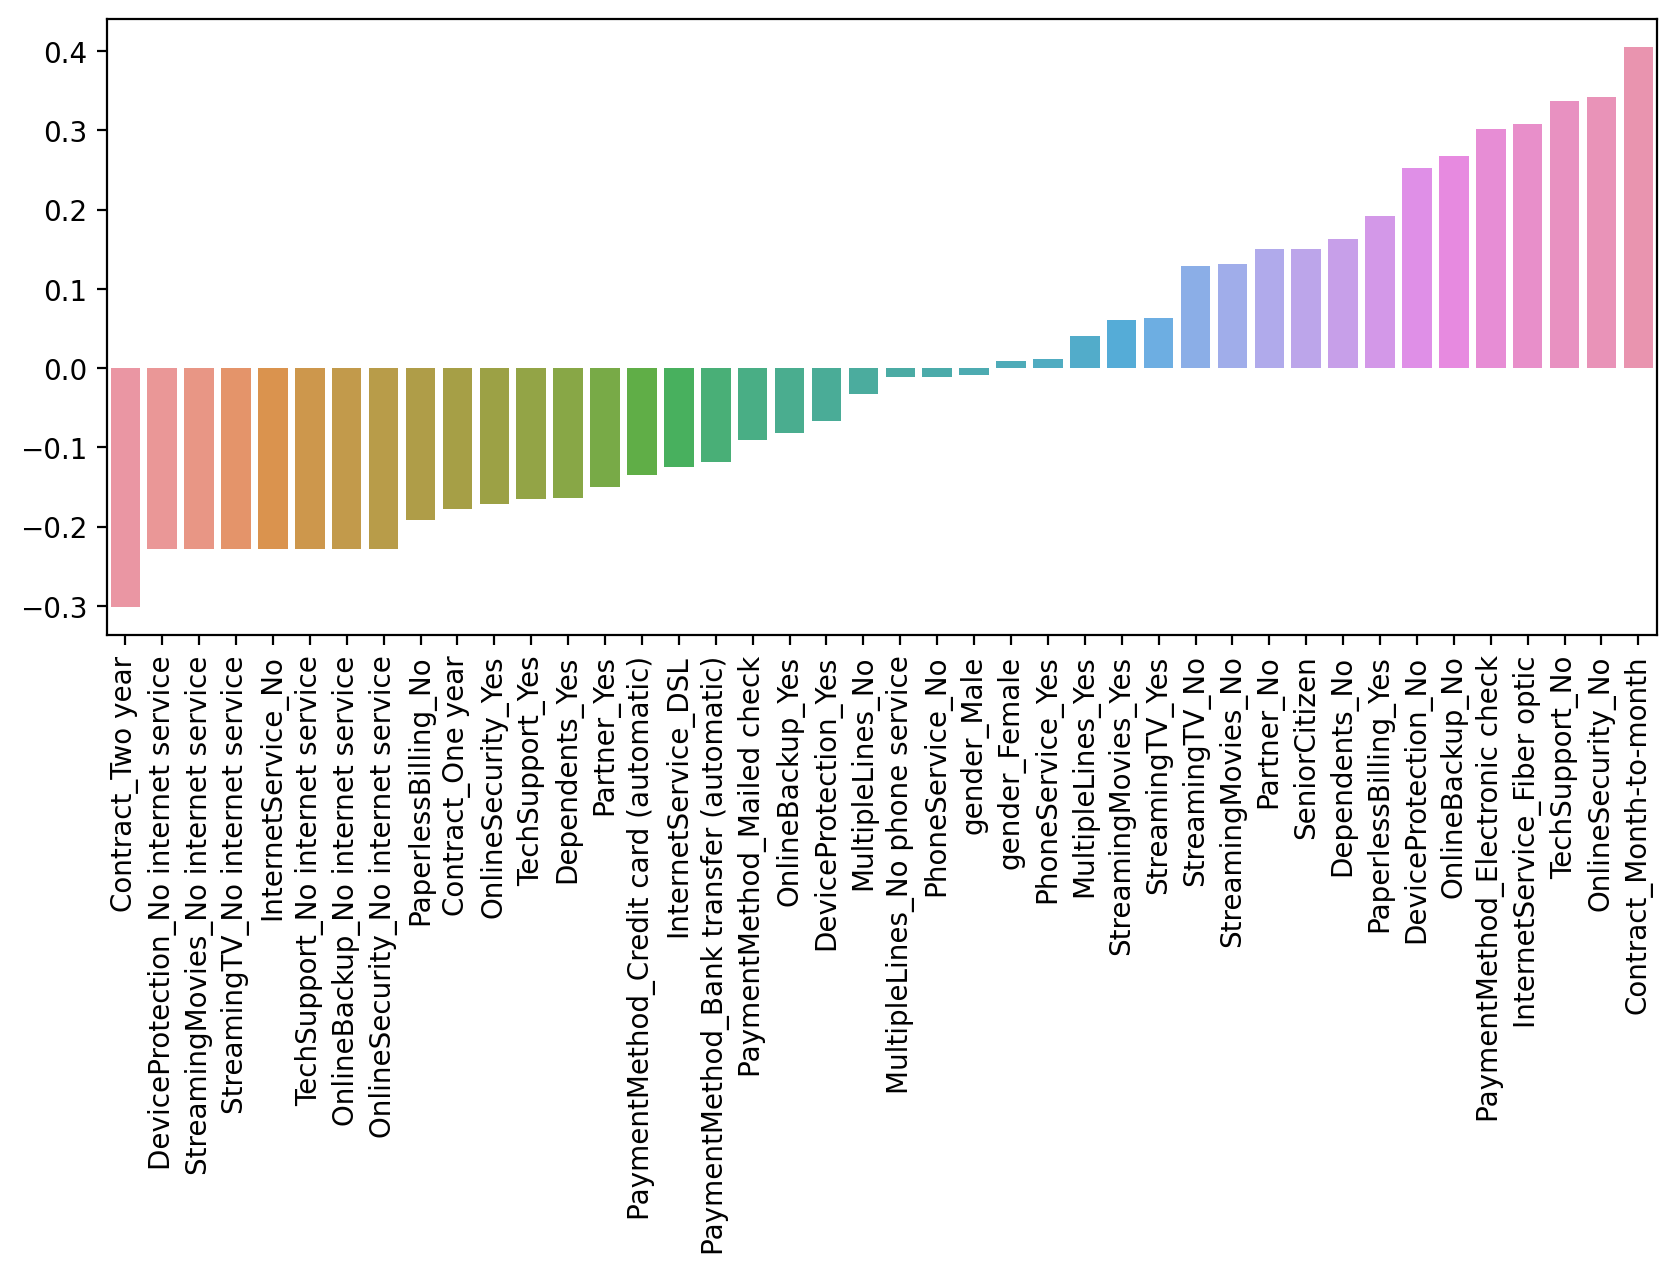

In [12]:
plt.figure(figsize = (10,4), dpi = 200)
sns.barplot(x = corr_yes_curn.index, y = corr_yes_curn.values)
plt.xticks(rotation = 90);

In [13]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

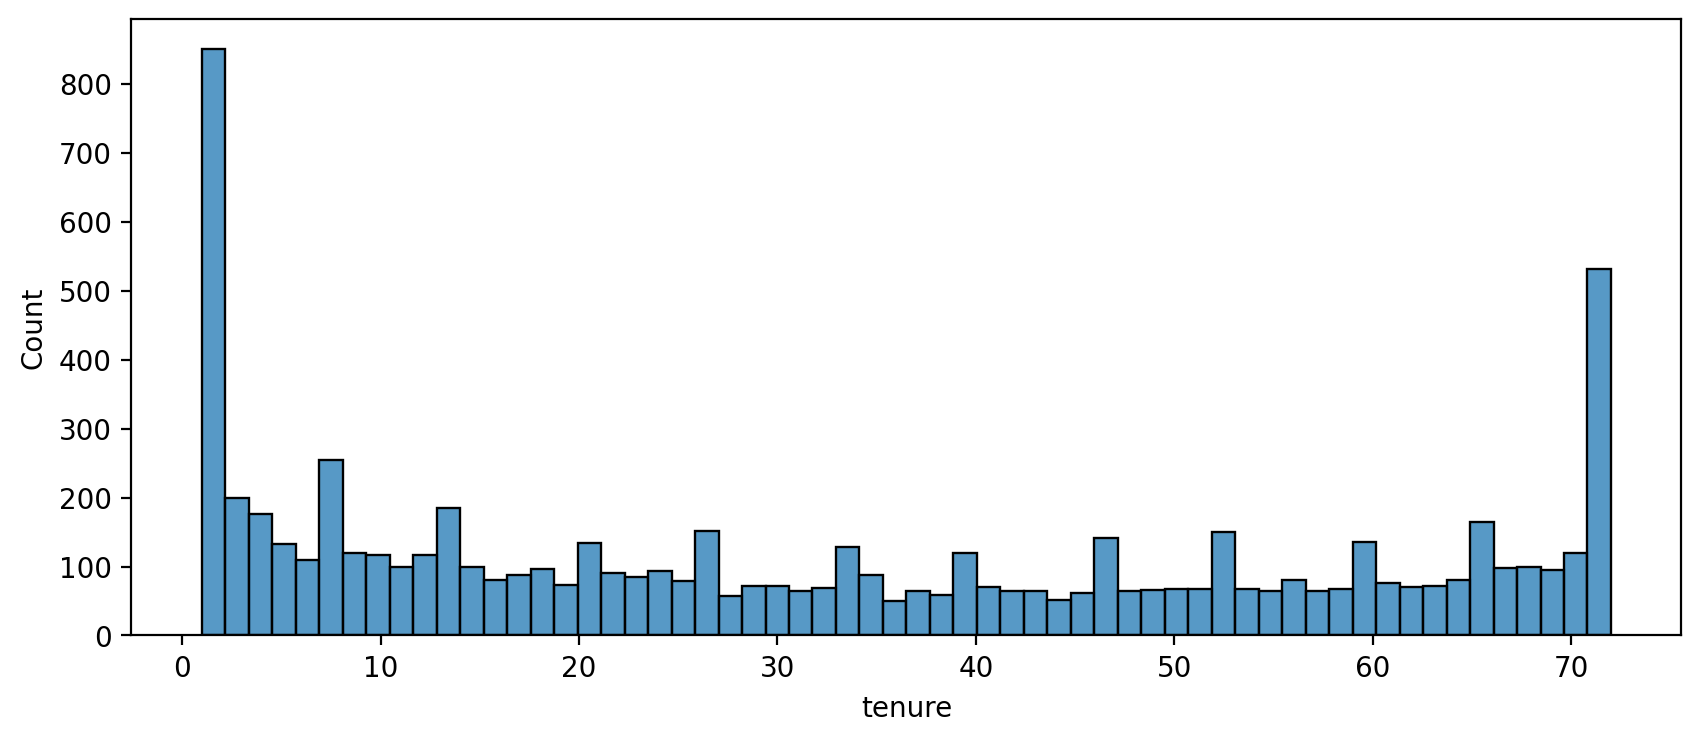

In [14]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = df, x = "tenure", bins = 60)
plt.show()

<Figure size 2000x800 with 0 Axes>

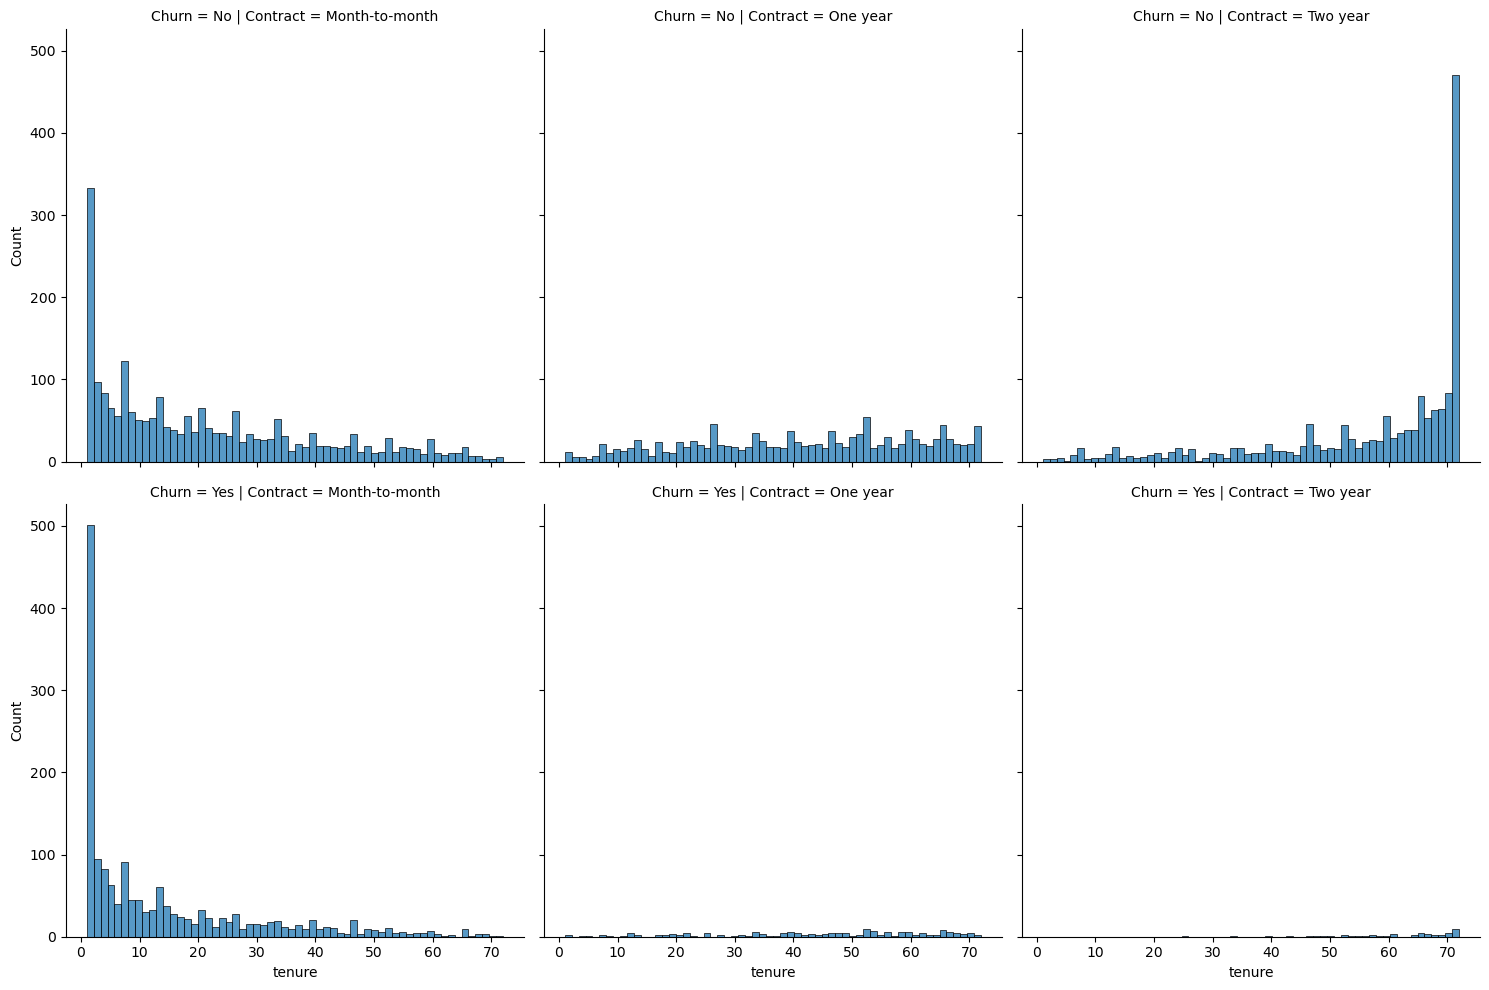

In [15]:
plt.figure(figsize = (10,4), dpi = 200)
sns.displot(data = df, x = "tenure", bins = 60, col = "Contract", row = "Churn")
plt.show()

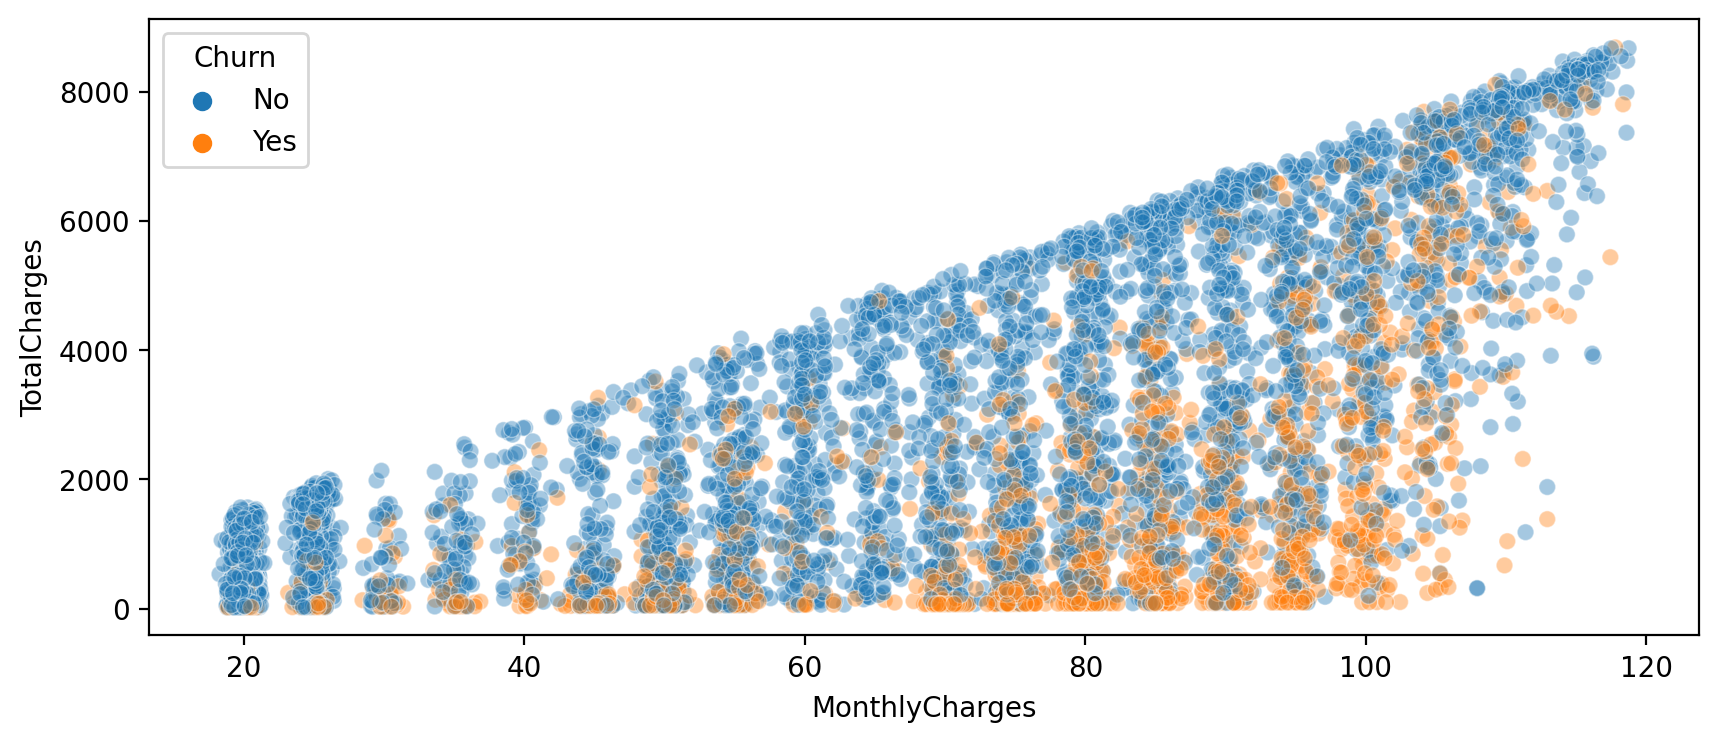

In [16]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df, x = "MonthlyCharges", y = "TotalCharges", hue = "Churn", alpha = 0.4)
plt.show()

In [17]:
yes = df.groupby(["Churn", "tenure"]).count().transpose()["Yes"]

In [18]:
no = df.groupby(["Churn", "tenure"]).count().transpose()["No"]

In [19]:
churn_rate = 100*yes/(no+yes)

<AxesSubplot:xlabel='tenure'>

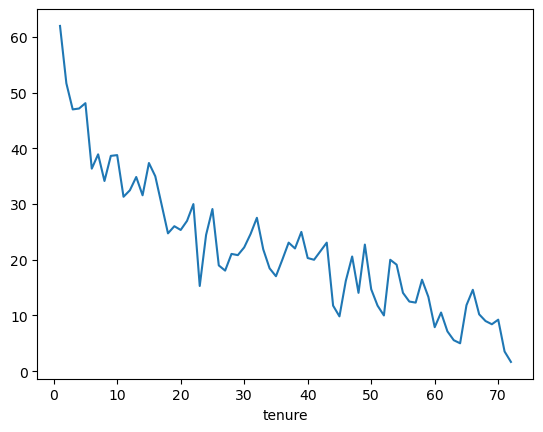

In [20]:
churn_rate.transpose()["customerID"].plot()

In [21]:
def cohort(tenure):
    if tenure < 13:
        return "0 - 12 Months"
    elif tenure < 25:
        return "12 - 24 Months"
    elif tenure < 49:
        return "24 - 48 Months"
    else:
        return "Over 48 Months"

In [22]:
df["Tenure Cohort"] = df["tenure"].apply(cohort)

In [23]:
df["Tenure Cohort"]

0        0 - 12 Months
1       24 - 48 Months
2        0 - 12 Months
3       24 - 48 Months
4        0 - 12 Months
             ...      
7027    12 - 24 Months
7028    Over 48 Months
7029     0 - 12 Months
7030     0 - 12 Months
7031    Over 48 Months
Name: Tenure Cohort, Length: 7032, dtype: object

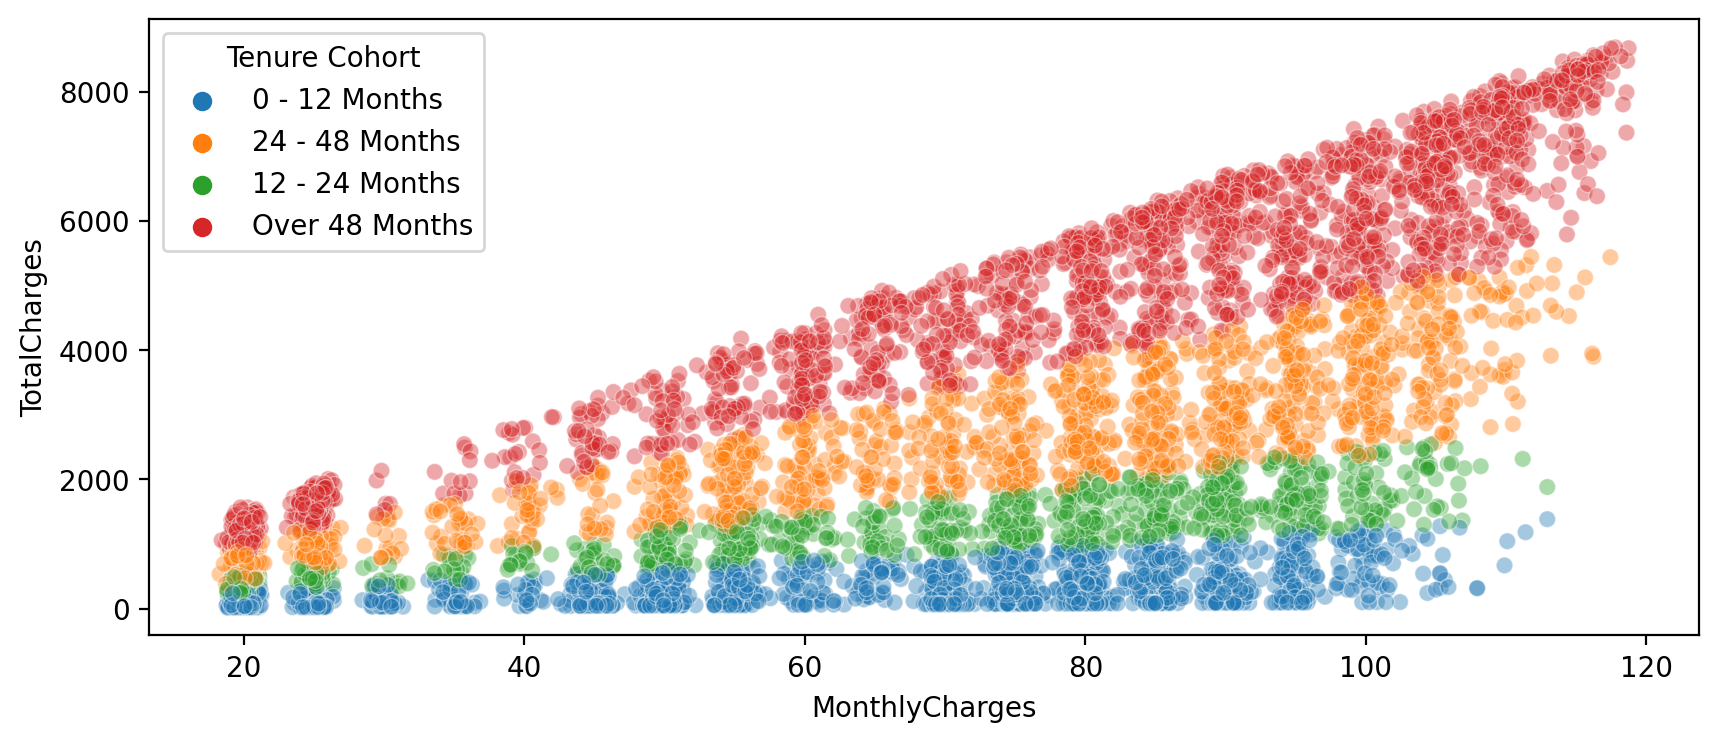

In [24]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df, x = "MonthlyCharges", y = "TotalCharges", hue = "Tenure Cohort", alpha = 0.4)
plt.show()

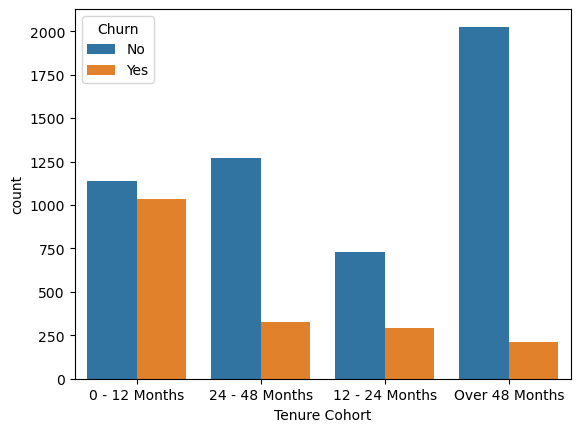

In [25]:
sns.countplot(data = df, x = "Tenure Cohort", hue = "Churn")
plt.show()

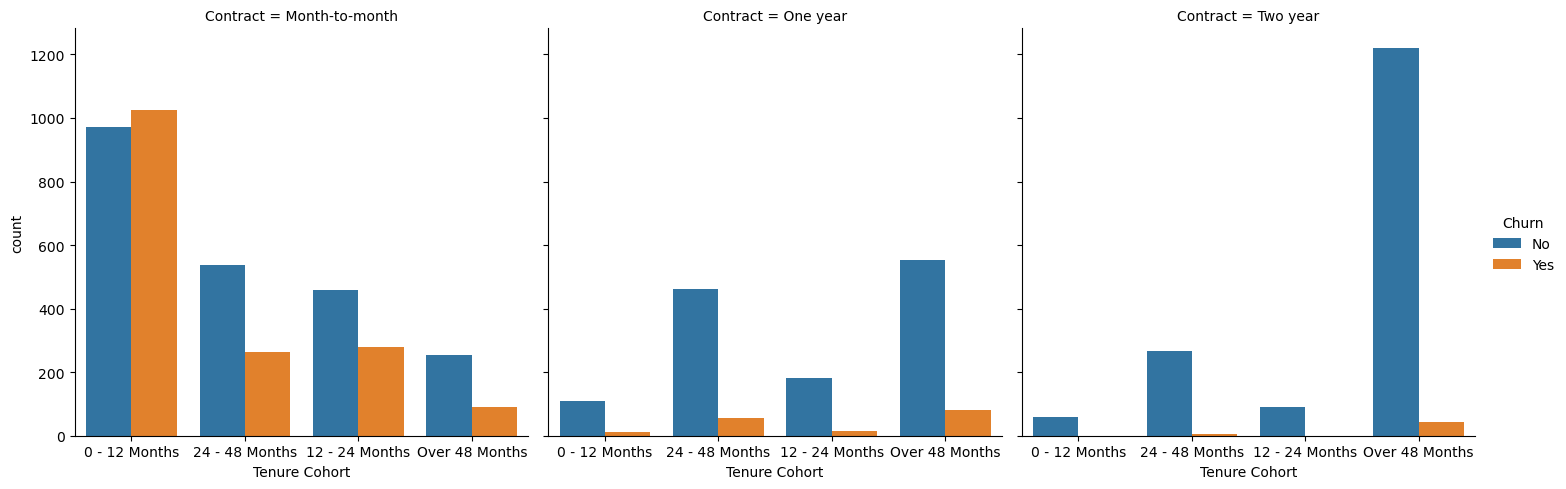

In [26]:
sns.catplot(data = df, x = "Tenure Cohort", hue = "Churn", kind = "count", col = "Contract")
plt.show()

In [27]:
X = df.drop(["customerID", "Churn"], axis = 1)

In [28]:
X = pd.get_dummies(X, drop_first = True)

In [29]:
y = df["Churn"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(max_depth = 6)

In [34]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [35]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [36]:
preds = dt.predict(X_test)

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\blizk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


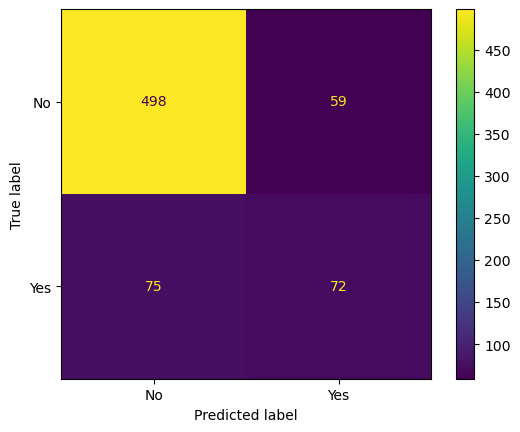

In [38]:
plot_confusion_matrix(dt, X_test, y_test)

In [39]:
dt.feature_importances_

array([0.0126805 , 0.42391407, 0.04348553, 0.06494213, 0.00123697,
       0.        , 0.        , 0.00785158, 0.        , 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.02628952, 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [40]:
important = pd.DataFrame(data = dt.feature_importances_, index = X.columns, columns = ["important"])

In [41]:
important = important.sort_values("important")
important = important[important>0]
important

,important
DeviceProtection_No internet service,NaN
Tenure Cohort_12 - 24 Months,NaN
PaymentMethod_Mailed check,NaN
PaymentMethod_Credit card (automatic),NaN
PaperlessBilling_Yes,NaN
StreamingMovies_Yes,NaN
StreamingMovies_No internet service,NaN
StreamingTV_Yes,NaN
StreamingTV_No internet service,NaN
DeviceProtection_Yes,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'DeviceProtection_No internet service'),
  Text(1, 0, 'Tenure Cohort_12 - 24 Months'),
  Text(2, 0, 'PaymentMethod_Mailed check'),
  Text(3, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(4, 0, 'PaperlessBilling_Yes'),
  Text(5, 0, 'StreamingMovies_Yes'),
  Text(6, 0, 'StreamingMovies_No internet service'),
  Text(7, 0, 'StreamingTV_Yes'),
  Text(8, 0, 'StreamingTV_No internet service'),
  Text(9, 0, 'DeviceProtection_Yes'),
  Text(10, 0, 'Tenure Cohort_24 - 48 Months'),
  Text(11, 0, 'OnlineBackup_No internet service'),
  Text(12, 0, 'Tenure Cohort_Over 48 Months'),
  Text(13, 0, 'Dependents_Yes'),
  Text(14, 0, 'InternetService_No'),
  Text(15, 0, 'Partner_Yes'),
  Text(16, 0, 'OnlineSecurity_No internet service'),
  Text(17, 0, 'MultipleLines_No phone service'),
  Text(18, 0, 'gender_Male'),
  Text(19, 0, 'OnlineBacku

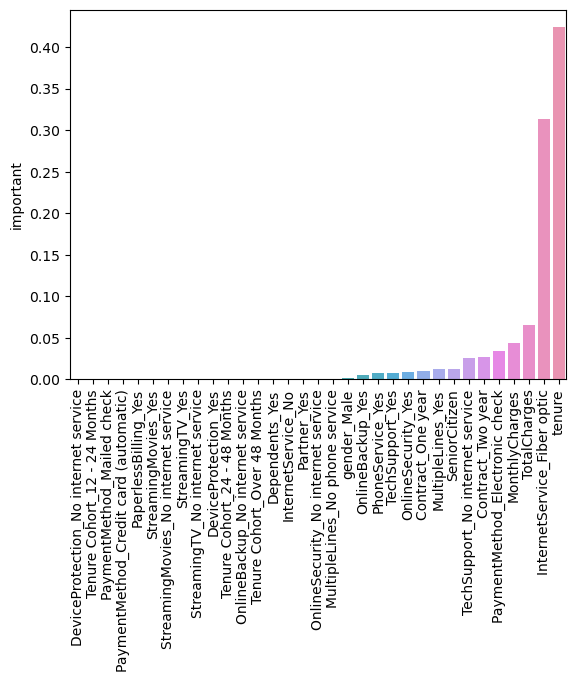

In [42]:
sns.barplot(data = important, x = important.index, y = "important")
plt.xticks(rotation = 90)

In [43]:
from sklearn.tree import plot_tree

[Text(0.48522727272727273, 0.9285714285714286, 'X[1] <= 17.5\ngini = 0.396\nsamples = 6328\nvalue = [4606, 1722]'),
 Text(0.2375, 0.7857142857142857, 'X[10] <= 0.5\ngini = 0.497\nsamples = 2387\nvalue = [1287, 1100]'),
 Text(0.1340909090909091, 0.6428571428571429, 'X[1] <= 5.5\ngini = 0.412\nsamples = 1343\nvalue = [954, 389]'),
 Text(0.07272727272727272, 0.5, 'X[18] <= 0.5\ngini = 0.482\nsamples = 696\nvalue = [414, 282]'),
 Text(0.03636363636363636, 0.35714285714285715, 'X[0] <= 0.5\ngini = 0.5\nsamples = 421\nvalue = [207, 214]'),
 Text(0.01818181818181818, 0.21428571428571427, 'X[2] <= 55.225\ngini = 0.499\nsamples = 370\nvalue = [194, 176]'),
 Text(0.00909090909090909, 0.07142857142857142, 'gini = 0.5\nsamples = 298\nvalue = [145, 153]'),
 Text(0.02727272727272727, 0.07142857142857142, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.05454545454545454, 0.21428571428571427, 'X[3] <= 43.65\ngini = 0.38\nsamples = 51\nvalue = [13, 38]'),
 Text(0.045454545454545456, 0.07142857

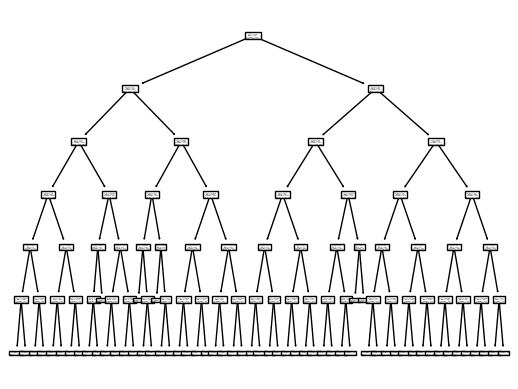

In [44]:
plot_tree(dt)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(max_depth = 6)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [48]:
preds = rf.predict(X_test)

In [49]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.60      0.45      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



C:\Users\blizk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


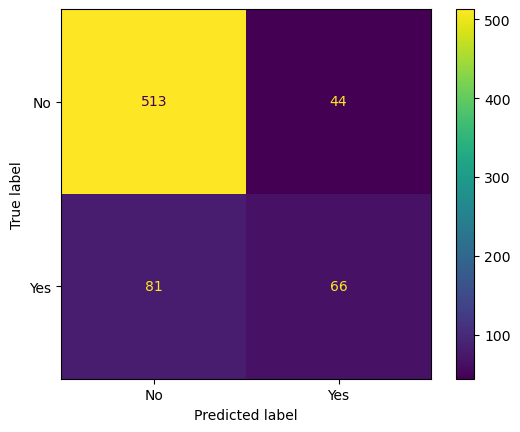

In [50]:
plot_confusion_matrix(rf, X_test, y_test)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [52]:
ada_model = AdaBoostClassifier()

In [53]:
gb_model = GradientBoostingClassifier()

In [54]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [55]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
ada_pred = ada_model.predict(X_test)

In [57]:
gb_pred = gb_model.predict(X_test)

In [58]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704

